In [116]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm

mu = 5
n = 100
alpha = 0.05

X: np.ndarray = norm.rvs(loc=mu, scale=1, size=n)

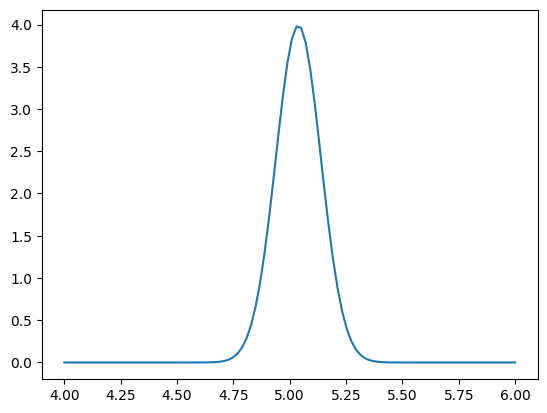

In [117]:
mu_hat = X.mean()
se_hat = np.sqrt(1/n)

Y = np.linspace(4, 6, n)
likelihood = norm.pdf(Y, loc=mu_hat, scale=se_hat)

plt.plot(Y, likelihood)
plt.show()

[4.84149424 5.21831414]


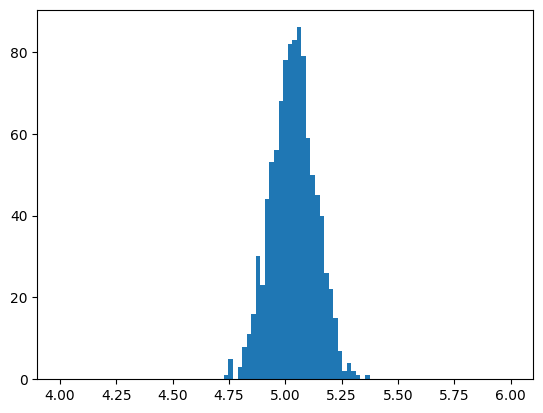

In [118]:
B = 1000
posteriors = norm.rvs(loc=mu_hat, scale=se_hat, size=B)
ci = np.quantile(posteriors, [alpha/2, 1-alpha/2])
print(ci)

plt.hist(posteriors, bins=Y)
plt.show()

[127.17319862 188.11148437]


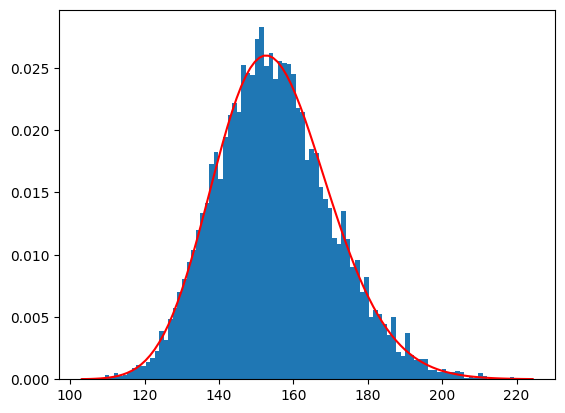

In [119]:
B = 1_000_0

post_density = lambda t: 1/(t * se_hat) * norm.pdf((np.log(t) - mu_hat)/se_hat)

post_theta: np.ndarray = np.exp(norm.rvs(loc=mu_hat, scale=se_hat, size=B))
bins = np.linspace(post_theta.min(), post_theta.max(), 100)

ci_theta = np.quantile(post_theta, [alpha/2, 1-alpha/2])
print(ci_theta)

plt.hist(post_theta, density=True, bins=bins)
plt.plot(bins, post_density(bins), color='r')
plt.show()

In [120]:
%reset -f

: 